Primer corte encontrado:
x = -0.17157288 (Valor exacto: -0.17157288)

Segundo corte encontrado:
x = -5.82842712

Primera Raiz:


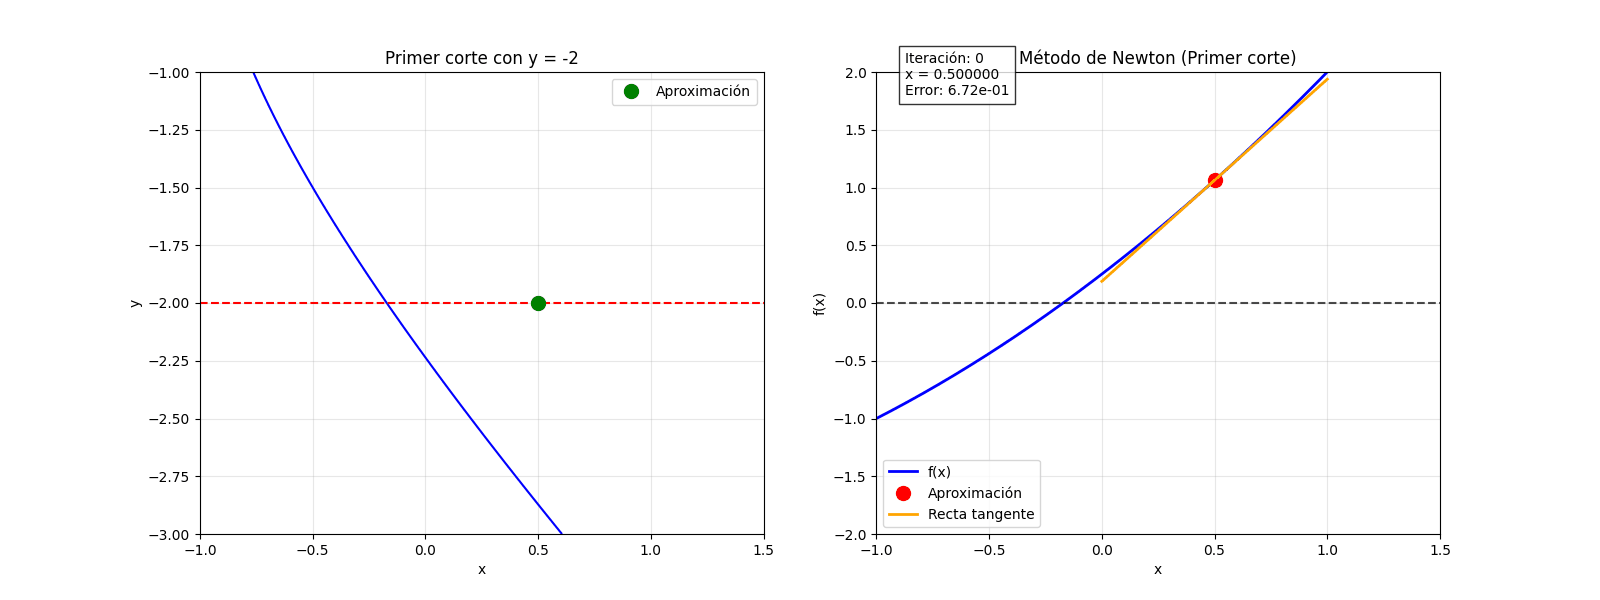


Segunda Raiz:


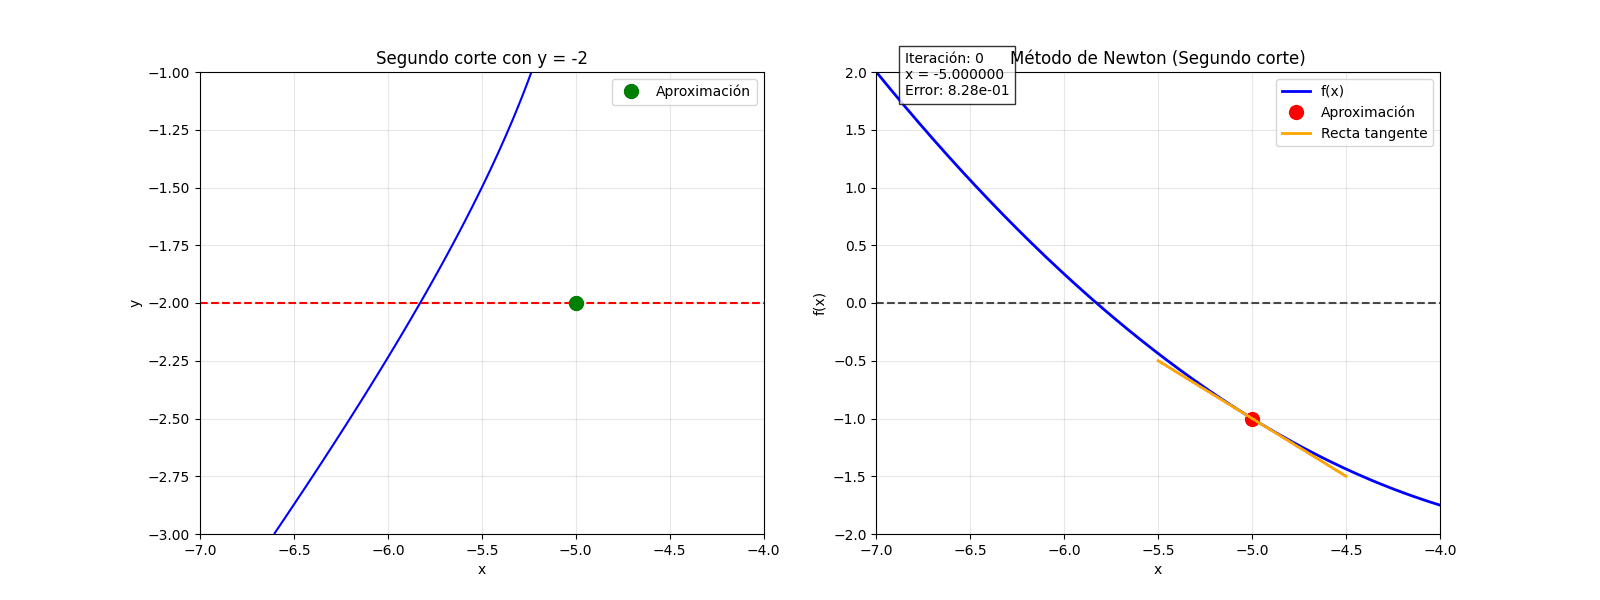

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display, Image
from matplotlib.animation import PillowWriter
import os

plt.style.use('default')

def original_curve(x, y):
    return (y/2)**2 - ((x+3)/2)**2 + 1

def f(x):
    return ((x + 3)/2)**2 - 2

def df(x):
    return (x + 3)/2

def newton_method(f, df, x0, tol=1e-10, max_iter=100):
    x = x0
    iterations = [x]
    for i in range(max_iter):
        fx = f(x)
        if abs(fx) < tol:
            break
        dfx = df(x)
        x = x - fx/dfx
        iterations.append(x)
    return iterations

gif_folder = "gifs_ejercicio1"
if not os.path.exists(gif_folder):
    os.makedirs(gif_folder)
    print(f"Carpeta '{gif_folder}' creada exitosamente")

x0 = 0.5
iterations = newton_method(f, df, x0)
exact_value = -3 + 2*np.sqrt(2)

print(f"Primer corte encontrado:")
print(f"x = {iterations[-1]:.8f} (Valor exacto: {exact_value:.8f})")

fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

x = np.linspace(-1, 1.5, 400)
y = np.linspace(-3, -1, 400)
X, Y = np.meshgrid(x, y)
Z = original_curve(X, Y)

ax1.contour(X, Y, Z, levels=[0], colors='blue')
ax1.axhline(y=-2, color='red', linestyle='--')
ax1.set_xlim(-1, 1.5)
ax1.set_ylim(-3, -1)
ax1.set_title('Primer corte con y = -2')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.grid(True, alpha=0.3)

x_vals = np.linspace(-1, 1.5, 400)
ax2.plot(x_vals, f(x_vals), 'b-', label='f(x)', linewidth=2)
ax2.axhline(0, color='black', linestyle='--', alpha=0.7)
ax2.set_xlim(-1, 1.5)
ax2.set_ylim(-2, 2)
ax2.set_title('Método de Newton (Primer corte)')
ax2.set_xlabel('x')
ax2.set_ylabel('f(x)')
ax2.legend()
ax2.grid(True, alpha=0.3)

point_curve, = ax1.plot([], [], 'go', markersize=10, label='Aproximación')
point_newton, = ax2.plot([], [], 'ro', markersize=10, label='Aproximación')
tangent, = ax2.plot([], [], 'orange', linewidth=2, label='Recta tangente')
text_info = ax2.text(0.05, 0.95, '', transform=ax2.transAxes, 
                    bbox=dict(facecolor='white', alpha=0.8), fontsize=10)

ax1.legend()
ax2.legend()

def animate_first(frame):
    if frame < len(iterations):
        x_current = iterations[frame]
        y_current = -2
        
        point_curve.set_data([x_current], [y_current])
        point_newton.set_data([x_current], [f(x_current)])
        
        if frame < len(iterations) - 1:
            x_tangent = np.linspace(x_current - 0.5, x_current + 0.5, 100)
            y_tangent = f(x_current) + df(x_current) * (x_tangent - x_current)
            tangent.set_data(x_tangent, y_tangent)
        
        error = abs(x_current - exact_value)
        text_info.set_text(f'Iteración: {frame}\nx = {x_current:.6f}\nError: {error:.2e}')
    
    return point_curve, point_newton, tangent, text_info

anim_first = FuncAnimation(fig1, animate_first, frames=len(iterations)+5, 
                          interval=1000, blit=True, repeat=True)

gif_path_first = f"{gif_folder}/newton_animation_first.gif"
writer = PillowWriter(fps=1)
anim_first.save(gif_path_first, writer=writer)

plt.close(fig1)

x0_second = -5.0
iterations_second = newton_method(f, df, x0_second)
exact_value_second = -3 - 2*np.sqrt(2)

print(f"\nSegundo corte encontrado:")
print(f"x = {iterations_second[-1]:.8f}")

fig2, (ax3, ax4) = plt.subplots(1, 2, figsize=(16, 6))

x_second = np.linspace(-7, -4, 400)
y_second = np.linspace(-3, -1, 400)
X_second, Y_second = np.meshgrid(x_second, y_second)
Z_second = original_curve(X_second, Y_second)

ax3.contour(X_second, Y_second, Z_second, levels=[0], colors='blue')
ax3.axhline(y=-2, color='red', linestyle='--')
ax3.set_xlim(-7, -4)
ax3.set_ylim(-3, -1)
ax3.set_title('Segundo corte con y = -2')
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.grid(True, alpha=0.3)

x_vals_second = np.linspace(-7, -4, 400)
ax4.plot(x_vals_second, f(x_vals_second), 'b-', label='f(x)', linewidth=2)
ax4.axhline(0, color='black', linestyle='--', alpha=0.7)
ax4.set_xlim(-7, -4)
ax4.set_ylim(-2, 2)
ax4.set_title('Método de Newton (Segundo corte)')
ax4.set_xlabel('x')
ax4.set_ylabel('f(x)')
ax4.legend()
ax4.grid(True, alpha=0.3)

point_curve_second, = ax3.plot([], [], 'go', markersize=10, label='Aproximación')
point_newton_second, = ax4.plot([], [], 'ro', markersize=10, label='Aproximación')
tangent_second, = ax4.plot([], [], 'orange', linewidth=2, label='Recta tangente')
text_info_second = ax4.text(0.05, 0.95, '', transform=ax4.transAxes, 
                           bbox=dict(facecolor='white', alpha=0.8), fontsize=10)

ax3.legend()
ax4.legend()

def animate_second(frame):
    if frame < len(iterations_second):
        x_current = iterations_second[frame]
        y_current = -2
        
        point_curve_second.set_data([x_current], [y_current])
        point_newton_second.set_data([x_current], [f(x_current)])
        
        if frame < len(iterations_second) - 1:
            x_tangent = np.linspace(x_current - 0.5, x_current + 0.5, 100)
            y_tangent = f(x_current) + df(x_current) * (x_tangent - x_current)
            tangent_second.set_data(x_tangent, y_tangent)
        
        error = abs(x_current - exact_value_second)
        text_info_second.set_text(f'Iteración: {frame}\nx = {x_current:.6f}\nError: {error:.2e}')
    
    return point_curve_second, point_newton_second, tangent_second, text_info_second

anim_second = FuncAnimation(fig2, animate_second, frames=len(iterations_second)+5, 
                           interval=1000, blit=True, repeat=True)

gif_path_second = f"{gif_folder}/newton_animation_second.gif"
anim_second.save(gif_path_second, writer=writer)

plt.close(fig2)

print("\nPrimera Raiz:")
display(Image(filename=gif_path_first))

print("\nSegunda Raiz:")
display(Image(filename=gif_path_second))